# Proyecto para la prediccion de nota usando la opinion del estudiante

In [1]:
!!pip3 install beautifulsoup4
!!pip3 install -U scikit-learn
!!pip3 install -U nltk
!!pip3 install -U gensim

['Requirement already up-to-date: gensim in /usr/local/lib/python3.7/site-packages (3.8.3)',
 'Requirement already satisfied, skipping upgrade: numpy>=1.11.3 in /usr/local/lib/python3.7/site-packages (from gensim) (1.18.2)',
 'Requirement already satisfied, skipping upgrade: six>=1.5.0 in /usr/local/lib/python3.7/site-packages (from gensim) (1.14.0)',
 'Requirement already satisfied, skipping upgrade: smart-open>=1.8.1 in /usr/local/lib/python3.7/site-packages (from gensim) (2.0.0)',
 'Requirement already satisfied, skipping upgrade: scipy>=0.18.1 in /usr/local/lib/python3.7/site-packages (from gensim) (1.5.0)',
 'Requirement already satisfied, skipping upgrade: boto in /usr/local/lib/python3.7/site-packages (from smart-open>=1.8.1->gensim) (2.49.0)',
 'Requirement already satisfied, skipping upgrade: boto3 in /usr/local/lib/python3.7/site-packages (from smart-open>=1.8.1->gensim) (1.14.12)',
 'Requirement already satisfied, skipping upgrade: requests in /usr/local/lib/python3.7/site-p

In [2]:
import reviews_scraper # Script para tomar las reseñas de internet
import nltk
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
import os
import numpy as np
import re
import pandas as pd
import math

In [3]:
""" iurls_unal = reviews_scraper.get_urls_unal()
urls_andes = reviews_scraper.get_urls_uniandes()
all_urls = urls_andes + urls_unal """

results ={}
differences={}
train_data = reviews_scraper.get_train_data("")
df = pd.DataFrame(train_data)

In [4]:
"""Checkear cuantos 5 hay"""
print(df[df[1] == "5"].count())
print(df.count())
df.head()

0    7677
1    7677
2    7677
dtype: int64
0    24399
1    24399
2    24399
dtype: int64


,0,1,2
0,"Es lo peor en serio no explica nada, no es cla...",2,https://losestudiantes.co/universidad-de-los-a...
1,"Todo un amor de profesor, no sé como sea para ...",5,https://losestudiantes.co/universidad-de-los-a...
2,El CBU es un poco aburrido si no te interesa e...,3.5,https://losestudiantes.co/universidad-de-los-a...
3,Es la clase más aburrida que he visto en la un...,1.5,https://losestudiantes.co/universidad-de-los-a...
4,"Hernando es muy buena persona, en realidad es ...",4,https://losestudiantes.co/universidad-de-los-a...


In [5]:
nltk.download("stopwords")
def preprocessing(doc):
    wpt=nltk.WordPunctTokenizer()
    stop_words=nltk.corpus.stopwords.words('spanish')
    # Se eliminan caracteres especiales
    replacements = (("á", "a"), ("é", "e"), ("í", "i"), ("ó", "o"),
                    ("ú", "u"))
    for a, b in replacements:
        doc = doc.replace(a, b)
    doc=re.sub(r'[^a-zA-Z\sñ]', '', doc, re.I|re.A)
    # Se convierten los téxtos a minúsculas
    doc=doc.lower()
    doc.strip("\n")
    # Se separan signos de puntuación
    tokens=wpt.tokenize(doc)
    # Se eliminan las stopwords
    tokens=[token for token in tokens if token not in stop_words and len(token)>2]
    # Retornamos una versión filtrada del texto
    return ' '.join(tokens)
def my_round(x, base=5):
    x*=10
    return str(int(base*round(x/base))/10)
def my_round_ceil(x, base=5):
    x*=10
    return str(int(base*math.ceil(x/base))/10)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/freddyalejandro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
for i in range(len(df)):
    df.iloc[i][0]=preprocessing(df.iloc[i][0])


## Clasificacion
Primero se probara un enfoque de clasificacion donde cada posible nota es un grupo y por una nueva opinion se intentara predecir la nota pensada.

### Clasificacion Discreta
En esta  clasificacion tendremos un enfoque discreto, es decir cada valor sera una etiqueta(string) y no un valor numerio, por tanto la prediccion estara ligada a esto datos discretos.

#### Se usara Word2Vect para la representacion del texto.

In [7]:
from gensim.models import word2vec

feature_size = 100 
window_context = 5 
min_word_count = 10
sample = 1e-3

# Escriba su código aquí

wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document) for document in df[0]]


w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size,
                              window=window_context, min_count=min_word_count,
                              sample=sample, iter=50)

In [8]:
def w2v_repr1(corpus, ):
    repr1 = [] 
    for item in corpus: 
      vectors = [] 
      vectors.append(np.zeros(feature_size))
      for word in item.split(" "): 
        try:
          vectors.append(w2v_model.wv[word])
        except:
          pass
      average = np.average(vectors, axis=0)
      repr1.append(average)
    return repr1

### Entrenamiento de  un modelo bayesiano

In [9]:
from sklearn.naive_bayes import *
nb_model = GaussianNB()


## Seleccion de datos de entrenamiento

In [10]:
X = w2v_repr1(df[0].to_numpy())
y=[my_round(float(x)) for x in df[1].to_numpy()]
kfold = KFold(4, True, 0,shuffle=True, random_state=0 )
folds =list(kfold.split(X))
score=cross_val_score(nb_model, X, y, cv=folds)
print(score)
max_score_index =np.argmax(score)
train,test=folds[max_score_index]
x_train,x_test,y_train,y_test = np.array(X)[train],np.array(X)[test],np.array(y)[train],np.array(y)[test]

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass shuffle=True, random_state=0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[0.33737705 0.34377049 0.33754098 0.33677652]


Usamos Cross validation con un fold del 25% 
## Analizando la precision de la clasificacion

In [11]:
# Entrenamiento
nb_model.fit(x_train, y_train)
# Prediction 
predictions = nb_model.predict(x_test)


from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [12]:
def print_precision(y_t,predict):
    r2_s = r2_score([float(x) for x in y_t],[float(p) for p in predict])
    print("Error cuadratico medio asumiendo que los resultados son valores continuos: ",r2_s)
    print(classification_report(y_t,predict))
    print("Accuracy + Gaussian: ",accuracy_score(y_t,predict))
    return r2_s

def print_tests(y_t,predict,preproc,rep,m):
    predict_number = [float(p) for p in predict]
    y_t_number = [float(t) for t in y_t]
    error={}
    l=len(y_t_number)
    for i in range(l):
        diff = abs(y_t_number[i]-predict_number[i])
        if diff in error:
            error[diff]+=1
        else:
            error[diff]=1
    for k in error.keys():
        error[k]=round(error[k]/l,2)
    print(sorted(error.items()))
    test1="es el mejor profesor del mundo enseña muy bien hace las clases dinamicas"
    test2="sus parciales son muy dificiles pero enseña bien"
    test3="No se aprende nada en la materia pero al menos se pasa"
    test4="La clase son solo tareas que pueden ser un poco largas, pero todo el tiempo de la clase se va en historias que poco o nada tienen que ver con los temas de la materia. Explica muy poca teoría."
    tests =[test1,test2,test3,test4]
    for i in range(len(tests)):
        tests[i]=preproc(tests[i])
    val = rep(tests)
    test_predictions=(m.predict(val))
    for i in range(len(tests)):
        print("Entrada: ",tests[i],"\nPrediccion: ",test_predictions[i])
    return sorted(error.items())


In [13]:
results['w2v_d']=print_precision(y_test,predictions)

Error cuadratico medio asumiendo que los resultados son valores continuos:  0.12244423135374227
              precision    recall  f1-score   support

         1.0       0.14      0.27      0.19       192
         1.5       0.40      0.33      0.36       336
         2.0       0.15      0.19      0.17       381
         2.5       0.15      0.16      0.15       214
         3.0       0.18      0.16      0.17       488
         3.5       0.18      0.27      0.22       462
         4.0       0.27      0.21      0.24       971
         4.5       0.25      0.32      0.28       942
         5.0       0.67      0.53      0.59      2114

    accuracy                           0.34      6100
   macro avg       0.27      0.27      0.26      6100
weighted avg       0.38      0.34      0.36      6100

Accuracy + Gaussian:  0.3437704918032787


Los resultados son bastante malos, esto puede ser debido a que una prediccion erronea se toma cuando los valores son difentes, aun si estos estan cerca, por ejemplo la prediccion da como resultado 3, y el valor real era 3.5, debido a esto se hara una clasificacion continua usando regresion lineal

In [14]:
differences['w2v_d']=print_tests(y_test, predictions,preprocessing,w2v_repr1,nb_model)

[(0.0, 0.34), (0.5, 0.32), (1.0, 0.15), (1.5, 0.07), (2.0, 0.04), (2.5, 0.03), (3.0, 0.02), (3.5, 0.01), (4.0, 0.01)]
Entrada:  mejor profesor mundo enseña bien hace clases dinamicas 
Prediccion:  5.0
Entrada:  parciales dificiles enseña bien 
Prediccion:  4.0
Entrada:  aprende materia menos pasa 
Prediccion:  1.5
Entrada:  clase solo tareas pueden ser largas tiempo clase historias ver temas materia explica poca teoria 
Prediccion:  3.0


Como se puede observar aproximandamente el 65% de resultados de las predicciones estan tienen un 0.5 de diferencia con el valor real, otro 15% esta con una diferencia de 1 al valor real, y el resto esta con un valor mayor. Esto hace ver que medir la precision de este modelo con las metricas para valores discretos, no solo poco diciente, si no que ademas es engañoso. Por tanto se hara una clasificacion con un enfoque continuo.

### Clasificacion Continua
En este caso haremos una clasificacion con valores continuos en lugar de tomar cada valor como una posible etiqueta. Se usara la misma representacion, WordVect.
Para esta clasificacion se hara una regresion lineal.

In [15]:


from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=False, normalize=False, copy_X=False, n_jobs=-1)
## debemos tener nuestra etiquetas como numeros y no como strings



In [16]:
X = w2v_repr1(df[0].to_numpy())
y=[(float(x)) for x in df[1].to_numpy()]
kfold = KFold(4, True, 0,shuffle=True, random_state=0 )
folds =list(kfold.split(X))
score=cross_val_score(lr, X, y, cv=folds, scoring='r2')
print(score)
max_score_index =np.argmax(score)
train,test=folds[max_score_index]
x_train,x_test,y_train,y_test = np.array(X)[train],np.array(X)[test],np.array(y)[train],np.array(y)[test]

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass shuffle=True, random_state=0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[0.49042148 0.48299324 0.45324722 0.45387023]


In [17]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=False, fit_intercept=False, n_jobs=-1)

### Analisis de resultados

In [18]:
performance = lr.score(x_test, y_test)
results['w2v_c']=performance
print(performance)

0.4904214794492292


Vemos una mejora bastante significativa en el r2 en relacion con el resultado anterior. El r2 esta cerca a 0.5 lo cual es bueno segun algunas interpretaciones de este puntaje.La interpretacion de este score depende del tipo de problema, si fuera algo netamente matematico este score seria malo, pero al tratarse de analisis de lenguaje natural es algo al menos aceptable que aun se puede mejorar.

In [19]:
test1="es el mejor profesor del mundo enseña muy bien hace las clases dinamicas"
test2="sus parciales son muy dificiles pero enseña bien"
test3="No se aprende nada en la materia pero al menos se pasa"
test4="La clase son solo tareas que pueden ser un poco largas, pero todo el tiempo de la clase se va en historias que poco o nada tienen que ver con los temas de la materia. Explica muy poca teoría."
tests =[test1,test2,test3,test4]
for i in range(len(tests)):
    tests[i]=preprocessing(tests[i])
val = w2v_repr1(tests)
test_predictions=(lr.predict(val))
for i in range(len(tests)):
    print("Entrada: ",tests[i],"\nPrediccion: ",round(test_predictions[i],2))


Entrada:  mejor profesor mundo enseña bien hace clases dinamicas 
Prediccion:  4.78
Entrada:  parciales dificiles enseña bien 
Prediccion:  2.83
Entrada:  aprende materia menos pasa 
Prediccion:  1.28
Entrada:  clase solo tareas pueden ser largas tiempo clase historias ver temas materia explica poca teoria 
Prediccion:  3.58


In [20]:
predict = lr.predict(x_test)
error={}
l=len(y_test)
for i in range(l):
    diff = my_round(abs(y_test[i]-predict[i]))
    if diff in error:
        error[diff]+=1
    else:
        error[diff]=1
for k in error.keys():
    error[k]=round(error[k]/l,2)
print(sorted(error.items()))
differences['w2v_c']=sorted(error.items())

[('0.0', 0.26), ('0.5', 0.4), ('1.0', 0.21), ('1.5', 0.08), ('2.0', 0.03), ('2.5', 0.01), ('3.0', 0.0), ('3.5', 0.0), ('4.5', 0.0)]


## Clasificacion con analisis de sentimientos

Ahora se probara hacer una clasificacion pero tomando como datos de entrada no el texto, si no el resultado de analisis de sentimiento del texto.

In [21]:
# Instalación de VADER
!!pip3 install vaderSentiment
#!!pip3 install pydeepl
!!pip3 install googletrans

['Requirement already satisfied: googletrans in /usr/local/lib/python3.7/site-packages (3.0.0)',
 'Requirement already satisfied: httpx==0.13.3 in /usr/local/lib/python3.7/site-packages (from googletrans) (0.13.3)',
 'Requirement already satisfied: certifi in /usr/local/lib/python3.7/site-packages (from httpx==0.13.3->googletrans) (2019.11.28)',
 'Requirement already satisfied: hstspreload in /usr/local/lib/python3.7/site-packages (from httpx==0.13.3->googletrans) (2020.6.23)',
 'Requirement already satisfied: idna==2.* in /usr/local/lib/python3.7/site-packages (from httpx==0.13.3->googletrans) (2.9)',
 'Requirement already satisfied: httpcore==0.9.* in /usr/local/lib/python3.7/site-packages (from httpx==0.13.3->googletrans) (0.9.1)',
 'Requirement already satisfied: chardet==3.* in /usr/local/lib/python3.7/site-packages (from httpx==0.13.3->googletrans) (3.0.4)',
 'Requirement already satisfied: rfc3986<2,>=1.3 in /usr/local/lib/python3.7/site-packages (from httpx==0.13.3->googletrans

In [22]:
train_data = reviews_scraper.get_train_data("")
df = pd.DataFrame(train_data)


Dado que VADER solo funciona para ingles es necesario hacer la traduccion del texto, eso puede hacer que se pierda un poco la precision. Tambien es necesaria cambiar el prepocesamiento.

In [23]:
from translate_utils import get_translated_reviews,translate_sentence
size = 25
bash = math.ceil(len(df[0].index)/size)
path_file = "./data/reviews_translated/reviews_translated_{}.json"
reviews_df=[]

for i in range(size):
    print(path_file.format(i))
    
    reviews_df.append(get_translated_reviews(pd.DataFrame(df[i*bash:(i+1)*bash]),8,path_file.format(i)))
reviews_translated = pd.concat(reviews_df)



./data/reviews_translated/reviews_translated_0.json
./data/reviews_translated/reviews_translated_1.json
./data/reviews_translated/reviews_translated_2.json
./data/reviews_translated/reviews_translated_3.json
./data/reviews_translated/reviews_translated_4.json
./data/reviews_translated/reviews_translated_5.json
./data/reviews_translated/reviews_translated_6.json
./data/reviews_translated/reviews_translated_7.json
./data/reviews_translated/reviews_translated_8.json
./data/reviews_translated/reviews_translated_9.json
./data/reviews_translated/reviews_translated_10.json
./data/reviews_translated/reviews_translated_11.json
./data/reviews_translated/reviews_translated_12.json
./data/reviews_translated/reviews_translated_13.json
./data/reviews_translated/reviews_translated_14.json
./data/reviews_translated/reviews_translated_15.json
./data/reviews_translated/reviews_translated_16.json
./data/reviews_translated/reviews_translated_17.json
./data/reviews_translated/reviews_translated_18.json
./d

In [24]:
print(len(reviews_translated[0].index))

24355


In [25]:
def preprocessing_en(doc):
    wpt=nltk.WordPunctTokenizer()
    stop_words=nltk.corpus.stopwords.words('english')
    # Se eliminan caracteres especiales
    doc=re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    # Se convierten los téxtos a minúsculas
    doc=doc.lower()
    doc.strip("\n")
    # Se separan signos de puntuación
    tokens=wpt.tokenize(doc)
    # Se eliminan las stopwords
    tokens=[token for token in tokens if token not in stop_words and len(token)>2]
    # Retornamos una versión filtrada del texto
    return ' '.join(tokens)

In [26]:
for i in range(len(reviews_translated)):
    reviews_translated.iloc[i][0]=preprocessing_en(reviews_translated.iloc[i][0])

In [27]:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# Creamos un analizador de sentimientos
analyzer=SentimentIntensityAnalyzer()


In [28]:
def doc_to_sentiment_values(doc):
    sentiment_values = []
    for d in doc:
        sentiment_values.append(list(analyzer.polarity_scores(d).values()))
    return sentiment_values



In [29]:
notes = [y[0] for y in  reviews_translated[1].to_numpy()]

### Clasificacion Discreta con analisis de sentimiento

In [30]:
nb_model_s = GaussianNB()

In [31]:
X = doc_to_sentiment_values(reviews_translated[0].to_numpy())
y=[my_round(float(x)) for x in notes]
kfold = KFold(4, True, 0,shuffle=True, random_state=0 )
folds =list(kfold.split(X))
score=cross_val_score(nb_model_s, X, y, cv=folds)
print(score)
max_score_index =np.argmax(score)
train,test=folds[max_score_index]
x_train,x_test,y_train,y_test = np.array(X)[train],np.array(X)[test],np.array(y)[train],np.array(y)[test]

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass shuffle=True, random_state=0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[0.38134341 0.37280342 0.38544917 0.3901117 ]


In [32]:
# Entrenamiento
nb_model_s.fit(x_train, y_train)
# Prediction 
predictions_s = nb_model_s.predict(x_test)

results['sent_d']=print_precision(y_test,predictions_s)

Error cuadratico medio asumiendo que los resultados son valores continuos:  0.02677097632125902
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       158
         1.5       0.25      0.50      0.33       335
         2.0       0.10      0.06      0.07       362
         2.5       0.00      0.00      0.00       179
         3.0       0.15      0.10      0.12       465
         3.5       0.00      0.00      0.00       455
         4.0       0.25      0.24      0.24      1011
         4.5       0.15      0.00      0.01       981
         5.0       0.49      0.88      0.63      2142

    accuracy                           0.39      6088
   macro avg       0.15      0.20      0.16      6088
weighted avg       0.27      0.39      0.29      6088

Accuracy + Gaussian:  0.39011169513797633


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Como se puede observar los resultados son mas malos usando solo un analisis de sentimientos que cuando usamos word2vetc, esto en parte se puede deber a la traduccion que obviamente no es pefecta pues se uso usando google translator 

In [33]:
def  translate_senr_en(doc):
    new_doc=[translate_sentence(d) for d in doc]
    return doc_to_sentiment_values(new_doc)

differences['sent_d']=print_tests(y_test,predictions_s,preprocessing_en,translate_senr_en,nb_model_s)


[(0.0, 0.39), (0.5, 0.22), (1.0, 0.18), (1.5, 0.07), (2.0, 0.06), (2.5, 0.03), (3.0, 0.03), (3.5, 0.02), (4.0, 0.0)]
Entrada:  mejor profesor del mundo ensea muy bien hace las clases dinamicas 
Prediccion:  5.0
Entrada:  sus parciales son muy dificiles pero ensea bien 
Prediccion:  4.0
Entrada:  aprende nada materia pero menos pasa 
Prediccion:  2.0
Entrada:  clase son solo tareas que pueden ser poco largas pero todo tiempo clase historias que poco nada tienen que ver con los temas materia explica muy poca teora 
Prediccion:  2.0


### Clasificacion continua con analisis de sentimientos

In [34]:

lr_s = LinearRegression(fit_intercept=False, normalize=False, copy_X=False, n_jobs=-1)

In [35]:
X = doc_to_sentiment_values(reviews_translated[0].to_numpy())
y=[float(x) for x in notes]
kfold = KFold(4, True, 0,shuffle=True, random_state=0 )
folds =list(kfold.split(X))
score=cross_val_score(lr_s, X, y, cv=folds,scoring='r2')
print(score)
max_score_index =np.argmax(score)
train,test=folds[max_score_index]
x_train,x_test,y_train,y_test = np.array(X)[train],np.array(X)[test],np.array(y)[train],np.array(y)[test]


[0.40664235 0.39766494 0.40216853 0.38454014]


/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass shuffle=True, random_state=0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [36]:
lr_s.fit(x_train, y_train)
performance = lr_s.score(x_test, y_test)
results['sent_c'] = performance
print(performance)
test1="es el mejor profesor del mundo enseña muy bien hace las clases dinamicas"
test2="sus parciales son muy dificiles pero enseña bien"
test3="No se aprende nada en la materia pero al menos se pasa"
test4="La clase son solo tareas que pueden ser un poco largas, pero todo el tiempo de la clase se va en historias que poco o nada tienen que ver con los temas de la materia. Explica muy poca teoría."
tests =[test1,test2,test3,test4]
for i in range(len(tests)):
    tests[i]=preprocessing_en(translate_sentence(tests[i]))
val = doc_to_sentiment_values(tests)
test_predictions=(lr_s.predict(val))
for i in range(len(tests)):
    print("Entrada: ",tests[i],"\nPrediccion: ",round(test_predictions[i],2))


0.4066423525964883
Entrada:  best teacher world teaches well dynamic classes 
Prediccion:  4.87
Entrada:  partials difficult teaches well 
Prediccion:  2.95
Entrada:  nothing learned subject least passed 
Prediccion:  3.2
Entrada:  class homework bit long class time goes stories little nothing subject matter explains little theory 
Prediccion:  3.35


In [37]:
predict = lr_s.predict(x_test)
error={}
l=len(y_test)
for i in range(l):
    diff = my_round(abs(y_test[i]-predict[i]))
    if diff in error:
        error[diff]+=1
    else:
        error[diff]=1
for k in error.keys():
    error[k]=round(error[k]/l,2)
print(sorted(error.items()))
differences['sent_c']=sorted(error.items())

[('0.0', 0.22), ('0.5', 0.43), ('1.0', 0.2), ('1.5', 0.08), ('2.0', 0.04), ('2.5', 0.02), ('3.0', 0.01), ('3.5', 0.0), ('4.5', 0.0)]


Usando el analisis de sentimientos como entrada para la clasificacion vemos que el r2 da cercano a 0.4 lo cual es inferior al resultado usando word2vect, esto puede darnos nuevas relaciones entre el texto de entrada y la salida o simplemente estar remarcando las ya existentes. Para verificar lo dicho se hara una ultima clasificacion mezclando los dos metodos, word2vect y analisis de sentimientos.

### clasificacion word2vect + analisis de sentimiento

In [38]:
train_data = reviews_scraper.get_train_data("")
df = pd.DataFrame(train_data)
for i in range(len(df)):
    df.iloc[i][0]=preprocessing(df.iloc[i][0])


In [39]:
notes = [y[0] for y in  reviews_translated[1].to_numpy()]

In [40]:
w2v_x_total = w2v_repr1(df[0].to_numpy())
sent_x_total =  doc_to_sentiment_values(reviews_translated[0].to_numpy())

In [41]:
print(len(w2v_x_total))
print(len(sent_x_total))
print(len(reviews_translated[0].index))

24399
24355
24355


In [42]:
w2v_sent_x_total=[0]*len(sent_x_total)

for i in range(len(sent_x_total)):
    w2v_sent_x_total[i]=(sent_x_total[i]) +list(w2v_x_total[reviews_translated.iloc[i][1][1]])
    

#### Clasificacion discreta

In [43]:
nb_model_ws = GaussianNB()


In [44]:
X = w2v_sent_x_total
y=[my_round(float(x)) for x in notes]
kfold = KFold(4, True, 0,shuffle=True, random_state=0 )
folds =list(kfold.split(X))
score=cross_val_score(nb_model_ws, X, y, cv=folds)
print(score)
max_score_index =np.argmax(score)
train,test=folds[max_score_index]
x_train,x_test,y_train,y_test = np.array(X)[train],np.array(X)[test],np.array(y)[train],np.array(y)[test]

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass shuffle=True, random_state=0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[0.35588767 0.3496469  0.3458696  0.35545335]


In [45]:

# Entrenamiento
nb_model_ws.fit(x_train, y_train)
# Prediction 
predictions_ws = nb_model_ws.predict(x_test)


print_precision(y_test,predictions_ws)
predict_number = [float(p) for p in predictions_ws]
y_t_number = [float(t) for t in y_test]
results['w2v_sent_d']=r2_score(y_t_number,predict_number)

Error cuadratico medio asumiendo que los resultados son valores continuos:  0.010260882806982452
              precision    recall  f1-score   support

         1.0       0.11      0.21      0.15       184
         1.5       0.24      0.26      0.25       349
         2.0       0.16      0.09      0.12       355
         2.5       0.07      0.04      0.05       222
         3.0       0.16      0.11      0.13       532
         3.5       0.13      0.12      0.12       442
         4.0       0.20      0.12      0.15       988
         4.5       0.19      0.07      0.11       909
         5.0       0.51      0.81      0.63      2108

    accuracy                           0.36      6089
   macro avg       0.20      0.20      0.19      6089
weighted avg       0.29      0.36      0.30      6089

Accuracy + Gaussian:  0.35588766628346197


In [46]:
predict_number_ws = [float(p) for p in predictions_ws]
y_t_number_ws = [float(t) for t in y_test]
error ={}
for i in range(len(predict_number_ws)):
    diff=abs(predict_number_ws[i] - y_t_number_ws[i])
    if diff in error:
        error[diff]+=1
    else:
        error[diff]=1
for k in error.keys():
    error[k] = round(error[k]/len(predict_number_ws), 2)
print(sorted(error.items()))
differences['w2v_sent_d']= sorted(error.items())
test1="es el mejor profesor del mundo enseña muy bien hace las clases dinamicas"
test2="sus parciales son muy dificiles pero enseña bien"
test3="No se aprende nada en la materia pero al menos se pasa"
test4="La clase son solo tareas que pueden ser un poco largas, pero todo el tiempo de la clase se va en historias que poco o nada tienen que ver con los temas de la materia. Explica muy poca teoría."
tests =[test1,test2,test3,test4]
for i in range(len(tests)):
    tests[i]=preprocessing_en(translate_sentence(tests[i]))
sent=doc_to_sentiment_values(tests)
test1="es el mejor profesor del mundo enseña muy bien hace las clases dinamicas"
test2="sus parciales son muy dificiles pero enseña bien"
test3="No se aprende nada en la materia pero al menos se pasa"
test4="La clase son solo tareas que pueden ser un poco largas, pero todo el tiempo de la clase se va en historias que poco o nada tienen que ver con los temas de la materia. Explica muy poca teoría."
tests =[test1,test2,test3,test4]
for i in range(len(tests)):
    tests[i]=preprocessing(tests[i])
w2v=w2v_repr1(tests)
val = []
for i in range(len(sent)):
    val.append(sent[i]+list(w2v[i]))
print(len(val))
test_predictions =nb_model_ws.predict(val)
for i in range(len(tests)):
    print("Entrada: ",tests[i],"\nPrediccion: ",test_predictions[i])

[(0.0, 0.36), (0.5, 0.23), (1.0, 0.18), (1.5, 0.09), (2.0, 0.07), (2.5, 0.03), (3.0, 0.03), (3.5, 0.01), (4.0, 0.01)]
4
Entrada:  mejor profesor mundo enseña bien hace clases dinamicas 
Prediccion:  5.0
Entrada:  parciales dificiles enseña bien 
Prediccion:  1.0
Entrada:  aprende materia menos pasa 
Prediccion:  2.5
Entrada:  clase solo tareas pueden ser largas tiempo clase historias ver temas materia explica poca teoria 
Prediccion:  1.0


### Clasificacion contiunua word2vect+analisis de sentimientos

In [47]:
lr_ws = LinearRegression(fit_intercept=False, normalize=False, copy_X=False, n_jobs=-1)



In [48]:
X = w2v_sent_x_total
y=[(float(x)) for x in notes]
kfold = KFold(4, True, 0,shuffle=True, random_state=0 )
folds =list(kfold.split(X))
score=cross_val_score(lr_ws, X, y, cv=folds,scoring='r2')
print(score)
max_score_index =np.argmax(score)
train,test=folds[max_score_index]
x_train,x_test,y_train,y_test = np.array(X)[train],np.array(X)[test],np.array(y)[train],np.array(y)[test]

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass shuffle=True, random_state=0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[0.40550042 0.39422471 0.40071078 0.38363103]


In [49]:
lr_ws.fit(x_train, y_train)

LinearRegression(copy_X=False, fit_intercept=False, n_jobs=-1)

In [50]:

performance_ws = lr_ws.score(x_test, y_test)
results['w2v_sent_c']=performance_ws
print(performance_ws)
test1="es el mejor profesor del mundo enseña muy bien hace las clases dinamicas"
test2="sus parciales son muy dificiles pero enseña bien"
test3="No se aprende nada en la materia pero al menos se pasa"
test4="La clase son solo tareas que pueden ser un poco largas, pero todo el tiempo de la clase se va en historias que poco o nada tienen que ver con los temas de la materia. Explica muy poca teoría."
tests =[test1,test2,test3,test4]
for i in range(len(tests)):
    tests[i]=preprocessing_en(translate_sentence(tests[i]))
sent=doc_to_sentiment_values(tests)
test1="es el mejor profesor del mundo enseña muy bien hace las clases dinamicas"
test2="sus parciales son muy dificiles pero enseña bien"
test3="No se aprende nada en la materia pero al menos se pasa"
test4="La clase son solo tareas que pueden ser un poco largas, pero todo el tiempo de la clase se va en historias que poco o nada tienen que ver con los temas de la materia. Explica muy poca teoría."
tests =[test1,test2,test3,test4]
for i in range(len(tests)):
    tests[i]=preprocessing(tests[i])
w2v=w2v_repr1(tests)
val = []
for i in range(len(sent)):
    val.append(sent[i]+list(w2v[i]))
print(len(val))
test_predictions=(lr_ws.predict(val))
for i in range(len(tests)):
    print("Entrada: ",tests[i],"\nPrediccion: ",round(test_predictions[i],2))

0.40550042186530266
4
Entrada:  mejor profesor mundo enseña bien hace clases dinamicas 
Prediccion:  4.74
Entrada:  parciales dificiles enseña bien 
Prediccion:  2.76
Entrada:  aprende materia menos pasa 
Prediccion:  3.16
Entrada:  clase solo tareas pueden ser largas tiempo clase historias ver temas materia explica poca teoria 
Prediccion:  3.51


Al parecer tomar word2vect + analisis sentimientos como datos de entrada para esta regresion lineal no dio ninguna mejoria, esto puede ser debido a que ambos metodos representan informacion similar del texto pero de una manera diferente, o que la forma de unir correcta de unir esta informacion no es simplemente concatenar los dos arreglos que representan el texto. En conclusion hasta no hallar un mejor metodo de unir estas dos representaciones lo mejor es usar una sola, para este caso especifico la mejor fue word2vect que dio mejores resultado.

In [51]:
predict = lr_ws.predict(x_test)
error={}
l=len(y_test)
for i in range(l):
    diff = my_round(abs(y_test[i]-predict[i]))
    if diff in error:
        error[diff]+=1
    else:
        error[diff]=1
for k in error.keys():
    error[k]=round(error[k]/l,2)
print(sorted(error.items()))
differences['word2vect_sent_c']=sorted(error.items())

[('0.0', 0.22), ('0.5', 0.43), ('1.0', 0.2), ('1.5', 0.08), ('2.0', 0.04), ('2.5', 0.02), ('3.0', 0.01), ('3.5', 0.0), ('4.5', 0.0)]


## Visualizacion de Resultados

In [52]:
!!pip3 install palettable

['Requirement already satisfied: palettable in /usr/local/lib/python3.7/site-packages (3.3.0)']

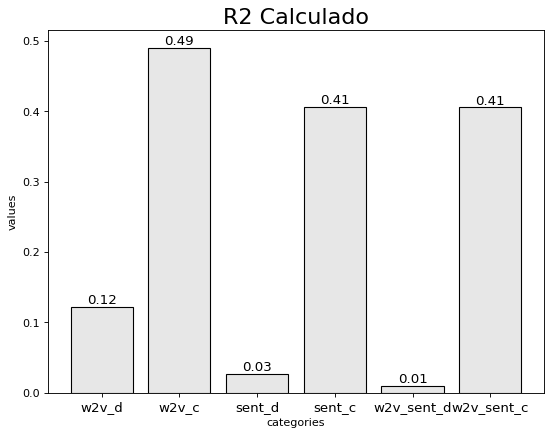

In [53]:
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure
text_color='k'
figure(num=None, figsize=(8, 6), dpi=80, facecolor=(1, 1, 1, 0), edgecolor='w')
plt.rcParams['axes.facecolor'] = (0.2, 0.4, 0.6, 0)
bar_c=plt.bar(range(len(results)), list(results.values()), align='center' ,color=(0.1, 0.1, 0.1, 0.1),  edgecolor=text_color)
plt.xticks(range(len(results)), list(results.keys()),color=text_color, size=12,wrap=True)
for rect in bar_c:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%.2f' %(height), ha='center', va='bottom',c=text_color,size=12)

#'center', 'right', 'left'
#'top', 'bottom', 'center', 'baseline', 'center_baseline'
plt.title('R2 Calculado', color=text_color, size=20)
plt.xlabel('categories',color=text_color)
plt.ylabel('values',color=text_color)

plt.show()


Diferencia entre valor calculado y obtenido: 
[(0.0, 0.34), (0.5, 0.32), (1.0, 0.15), (1.5, 0.07), (2.0, 0.04), (2.5, 0.03), (3.0, 0.02), (3.5, 0.01), (4.0, 0.01)]


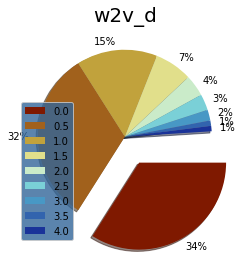

[('0.0', 0.26), ('0.5', 0.4), ('1.0', 0.21), ('1.5', 0.08), ('2.0', 0.03), ('2.5', 0.01), ('3.0', 0.0), ('3.5', 0.0), ('4.5', 0.0)]


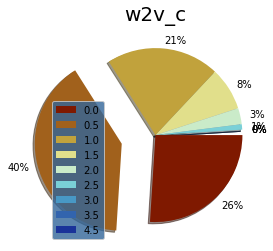

[(0.0, 0.39), (0.5, 0.22), (1.0, 0.18), (1.5, 0.07), (2.0, 0.06), (2.5, 0.03), (3.0, 0.03), (3.5, 0.02), (4.0, 0.0)]


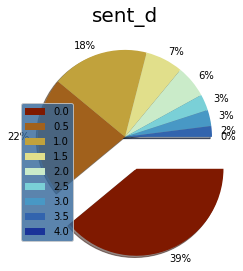

[('0.0', 0.22), ('0.5', 0.43), ('1.0', 0.2), ('1.5', 0.08), ('2.0', 0.04), ('2.5', 0.02), ('3.0', 0.01), ('3.5', 0.0), ('4.5', 0.0)]


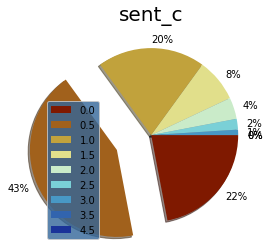

[(0.0, 0.36), (0.5, 0.23), (1.0, 0.18), (1.5, 0.09), (2.0, 0.07), (2.5, 0.03), (3.0, 0.03), (3.5, 0.01), (4.0, 0.01)]


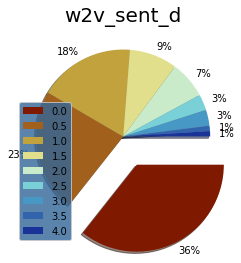

[('0.0', 0.22), ('0.5', 0.43), ('1.0', 0.2), ('1.5', 0.08), ('2.0', 0.04), ('2.5', 0.02), ('3.0', 0.01), ('3.5', 0.0), ('4.5', 0.0)]


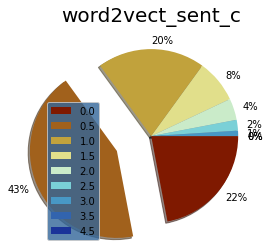

In [54]:
import matplotlib.colors as mcolors
print('Diferencia entre valor calculado y obtenido: ')
from palettable.scientific.diverging import Roma_9
for k,v in (differences.items()):
    print(v)
    colors = Roma_9.mpl_colors
    values = [k1[1] for k1 in v]
    explode =[0]*len(values)
    max_index= values.index(max(values))
    explode[max_index]=values[max_index]
    labels = [k1[0] for k1 in v]
    plt.pie(values, colors=colors, labels= [str(int(val*100))+'%' for val in values],explode=explode,counterclock=False, shadow=True)
    plt.title(k,size=20)
    plt.legend(labels,loc=3)
    plt.show()